In [0]:
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt
from math import *



def hierarchical_graph(z1,z2,z3,p):
#parameter: z1,z2,z3: any node possesses z1, z2 and z3 links in the first, second and third hierarchical level
#parameter: p: probability of topology failure


#Generating the graph
#g is the graph with no noise
#g1 is the graph with topology noise of probability p
    g=nx.empty_graph(256)
    g1=nx.empty_graph(256)
    for i in g.nodes():
        #g.nodes[i]['package']=0
        if (i<64):
            g.nodes[i]['community']=0
        elif (i<128):
            g.nodes[i]['community']=1
        elif (i<192):
            g.nodes[i]['community']=2
        else:
            g.nodes[i]['community']=3
    #building communities
    for i in g.node():
        k=random.sample(range(16*(i//16), 16*(i//16)+16), z1)
        k+=random.sample(list(range(64*(i//64), 16*(i//16)))+list(range(16*(i//16)+16, 64*(i//64)+64)), z2)
        k+=random.sample(list(range(0, 64*(i//64)))+list(range(64*(i//64)+64, 255)), z3)
        for j in range(len(k)):
            g.add_edge(i, k[j])
    
    g1=g
    #Rewiring process
    for i in g1.node():
        for j in g1.neighbors(i):
            if random.random() > p:
                g1.add_edge(i,random.choice(list(g1.nodes()-g1.neighbors(i))))#add 1 edge randomly
                g1.remove_edge(i,random.choice(list(g1.neighbors(i))))#remove 1 edge randomly
    
    return g,g1

In [0]:
def simulation(g,g1,T,p,q):
    t=0
    #choose sender and receiver node randomly
    sender=random.randint(0,255)
    receiver=random.randint(0,255)
    while (receiver==sender):
        receiver=random.randint(0,255)

    while ((t<=T) and (sender!=receiver)):
        #print(t,sender,receiver)
        if ((sender in g1.neighbors(receiver)) and (random.random()>q)):
            sender=receiver
            #send to a neighbor in the same cluster with receiver
        elif (random.random()>q):
            r_community=g.nodes[receiver]['community']
            candidate=[]
            for i in g1.neighbors(sender):                
                if (g.node[i]['community']==r_community):
                    candidate.append(i)
            if (candidate!=[]):
                sender=random.choice(candidate)
        #send to a random neighor
            else:
                sender=random.choice(list(g1.neighbors(sender)))
        else:
            sender=random.choice(list(g1.neighbors(sender)))
        t=t+1

    #if (t==T+1):
    #    print('Failure')
    #else:
    #    print(t,sender,receiver,'Success')
    return t

In [0]:
T=100
DDL=10
q=0
time=1000
step_p=[]
failure_p=[]
avg_step=[]
avg_failure=[]

for p in np.linspace(0.0, 1.0, num=101):
    g,g1 = hierarchical_graph(12,5,1,p)
    failure=0
    for i in range (time):       
        avg_step.append(1/simulation(g,g1,T,p,q))
        if (simulation(g,g1,T,p,q)>DDL):
            failure+=1
            
    step_p.append(np.mean(avg_step))
    failure/=time
    failure=1-failure
    failure_p.append(failure)
    print(p)

0.0
0.01
0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1
0.11
0.12
0.13
0.14
0.15


KeyboardInterrupt: 

ValueError: x and y must have same first dimension, but have shapes (101,) and (16,)

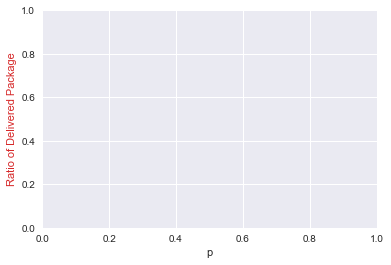

In [0]:
#plt.plot(failure_p)
#plt.plot(step_p)
#plt.show()

t = np.arange(0, 1.01, 0.01)
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('p')
ax1.set_ylabel('Ratio of Delivered Package', color=color)
ax1.plot(t, failure_p, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Inverse of Package Delivery Time', color=color)  # we already handled the x-label with ax1
ax2.plot(t, step_p, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('No Dynamic Noise, q=0')
plt.show()

In [0]:
T=100
DDL=10
p=0
time=10000
step_q=[]
failure_q=[]
avg_step=[]
avg_failure=[]

for q in np.linspace(0.0, 1.0, num=101):
    g,g1 = hierarchical_graph(12,5,1,p)
    #time=10
    failure=0
    for i in range (time):
        avg_step.append(1/simulation(g,g1,T,p,q))
        if (simulation(g,g1,T,p,q)>DDL):
            failure+=1
            
    step_q.append(np.mean(avg_step))
    failure/=time
    failure=1-failure
    failure_q.append(failure)
    print(q)

KeyboardInterrupt: 

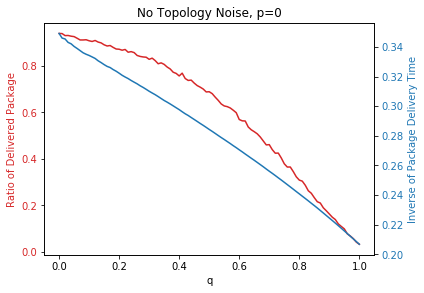

In [0]:
#plt.plot(failure_p)
#plt.plot(step_p)
#plt.show()

t = np.arange(0, 1.01, 0.01)
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('q')
ax1.set_ylabel('Ratio of Delivered Package', color=color)
ax1.plot(t, failure_q, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Inverse of Package Delivery Time', color=color)  # we already handled the x-label with ax1
ax2.plot(t, step_q, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('No Topology Noise, p=0')
plt.show()


In [0]:
T=100
DDL=10
time=1000
step_result=[]
failure_result=[]
avg_step=[]
avg_failure=[]

for p in np.linspace(0.0, 1.0, num=21):
    g,g1 = hierarchical_graph(12,5,1,p)
    for q in np.linspace(0.0, 1.0, num=21):
        failure=0
        steplist=[]
        for i in range (time):            
            steplist.append(1/simulation(g,g1,T,p,q))
            if (simulation(g,g1,T,p,q)>DDL):
                failure+=1
        avg_step=np.mean(steplist)
        step_result.append(avg_step)
        failure/=time
        failure=1-failure
        failure_result.append(failure)
    print(p,q)

0.0 1.0
0.05 1.0
0.1 1.0
0.15000000000000002 1.0
0.2 1.0
0.25 1.0
0.30000000000000004 1.0
0.35000000000000003 1.0
0.4 1.0
0.45 1.0
0.5 1.0
0.55 1.0
0.6000000000000001 1.0
0.65 1.0
0.7000000000000001 1.0
0.75 1.0
0.8 1.0
0.8500000000000001 1.0
0.9 1.0
0.9500000000000001 1.0
1.0 1.0


In [0]:
step=[]
fail=[]
for i in range (21):
    step.append(step_result[(i*21):(i*21+21)])
    fail.append(failure_result[(i*21):(i*21+21)])

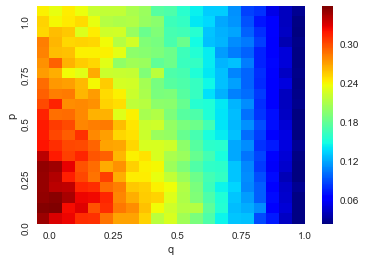

In [0]:
import seaborn as sns; sns.set()

ax = sns.heatmap(step, cmap="jet")
plt.xticks(np.linspace(1, 21, num=5), [str(x) for x in np.linspace(0, 1, num=5)])
plt.yticks(np.linspace(1, 21, num=5), [str(x) for x in np.linspace(1, 0, num=5)])
ax.set_xlabel('q')
ax.set_ylabel('p')

plt.show()


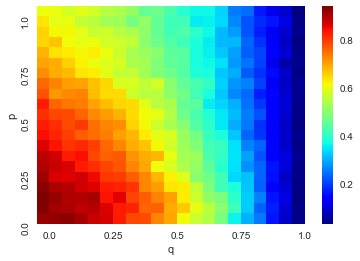

In [0]:
ax = sns.heatmap(fail, cmap="jet")
plt.xticks(np.linspace(1, 21, num=5), [str(x) for x in np.linspace(0, 1, num=5)])
plt.yticks(np.linspace(1, 21, num=5), [str(x) for x in np.linspace(1, 0, num=5)])

ax.set_xlabel('q')
ax.set_ylabel('p')

plt.show()